## **Normal Distribution 正态分布**

## 例题  

A testing agency wants to analyze the complexity of SAT Exam 2020. They have collected the SAT scores of 1000 students in "sat_score.csv". Let's answer some of the questions that will help to decide the complexity of SAT exam 2020.


 
1. Calculate the probability that a student will score less than 800 in SAT exam.
2. Calculate the probability that a student will score more than 1300 in SAT exam.
3. Calculate the minimum marks a student must score to secure the 90th percentile.
4. Calculate the minimum marks a student must score to be in the top 5%.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #可視化用
import seaborn as sns #可視化用
%matplotlib inline　
import scipy.stats as stats #科学計算用

In [4]:
sat_score = pd.read_csv("sat_score.csv")
sat_score.head()

,student_id,score
0,1,1018
1,2,1218
2,3,611
3,4,723
4,5,541


In [5]:
# 首先计算平均值和标准偏差(SD)
# 导入正态分布函数（norm）

from scipy.stats import norm

# 计算SAT scores数据里的平均值和SD

mu = sat_score["score"].mean()
sigma = sat_score["score"].std()
print("The estimated mean is", round(mu, 2))
print("The estimated standard deviation is", round(sigma, 2))

The estimated mean is 1007.46
The estimated standard deviation is 204.43


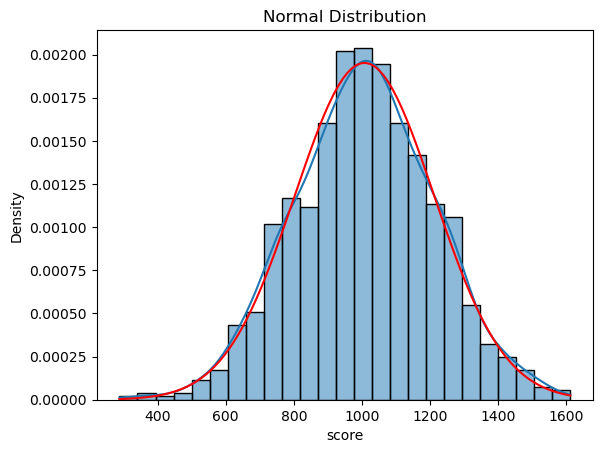

In [6]:
# 使用平均值和SD能帮助我们分析数据的形状和视觉化正态分布的pdf（概率密度函数）
# 使用norm.pdf()画出SAT scores的pdf
density = pd.DataFrame() # 创建一个空的dataframe
density["x"] = np.linspace(
    sat_score["score"].min(), sat_score["score"].max(), 100
) # create an array of 100 numbers in between the min and max score range and store it in the first column of the empty dataframe
density["pdf"] = norm.pdf(density["x"], mu, sigma) # calculate the pdf() of the created numbers and store it in another column named 'pdf'

fig, ax = plt.subplots() # create the subplot

sns.histplot(sat_score["score"], ax=ax, kde=True, stat="density") # plot the distribution of data using histogram
ax.plot(density["x"], density["pdf"], color="red") # plot the pdf of the normal distribution
plt.title("Normal Distribution") # set the title
plt.show() # display the plot

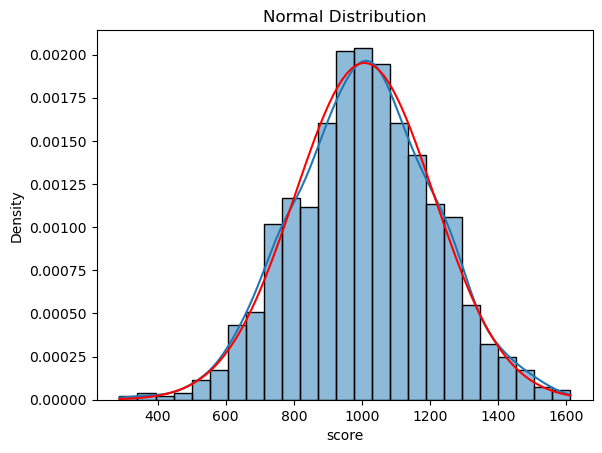

In [7]:
# calculate the pdf of SAT scores using norm.pdf()
density = pd.DataFrame() # create an empty dataframe
density["x"] = np.linspace(
    sat_score["score"].min() - 0.01, sat_score["score"].max() + 0.01, 100
) # create an array of 100 numbers in between the min and max score range and store it in the first column of the empty dataframe
density["pdf"] = norm.pdf(density["x"], mu, sigma) # calculate the pdf() of the created numbers and store it in another column named 'pdf'

fig, ax = plt.subplots() # create the subplot
sns.histplot(sat_score["score"], ax=ax, kde=True, stat="density") # plot the distribution of data using histogram
ax.plot(density["x"], density["pdf"], color="red") # plot the pdf of the normal distribution
plt.title("Normal Distribution") # set the title
plt.show() # display the plot

In [8]:
# find the cumulative probability
# norm.cdf() calculates the cumulative probability
prob_less_than_800 = norm.cdf(800, mu, sigma)
print(
    "The probability that a student will score less than 800 is",
    round(prob_less_than_800, 4),
)

The probability that a student will score less than 800 is 0.1551


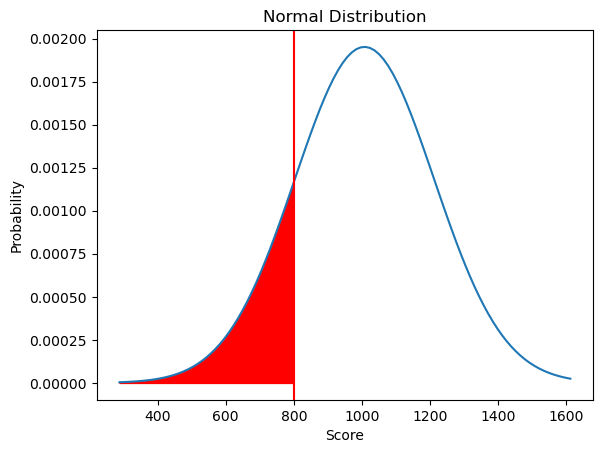

In [9]:
# plot the probability distribution
# we are plotting the distributions here to better visualize the calculations
# ofcourse you do not 'need' to create the following visualization to answer the question above
# you can directly use the cdf function for probability calculations
plt.plot(density["x"], density["pdf"]) # plot the pdf of the normal distribution
plt.axvline(x=800, c="r") # draw a red vertical line at x = 800
x1 = np.linspace(density["x"].min(), 800, 50) # create an array of 50 numbers between min SAT score and 800
plt.fill_between(x1, norm.pdf(x1, mu, sigma), color="r") # fill the specified region with red color
plt.xlabel("Score") # set the x-axis label
plt.ylabel("Probability") # set the y-axis label
plt.title("Normal Distribution") # set the title
plt.show() # display the plot

In [10]:
# find the cumulative probability and subtract it from 1 to calculate the probability that a student will score more than 1300
prob_greater_than_1300 = 1 - norm.cdf(1300, mu, sigma)
print(
    "The probability that a student will score more than 1300 is",
    round(prob_greater_than_1300, 4),
)

The probability that a student will score more than 1300 is 0.0762


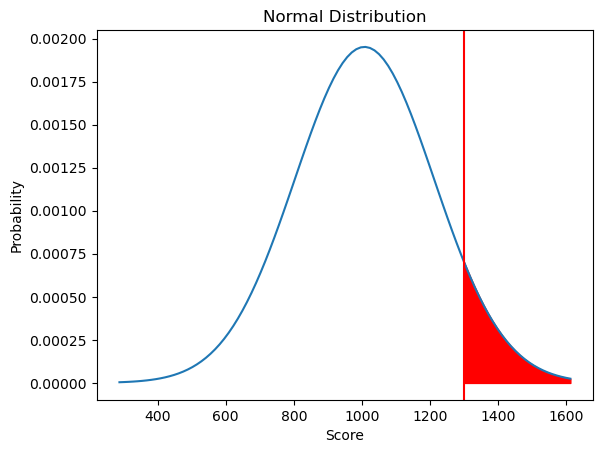

In [11]:
# plot the probability distribution
# we are plotting the distributions here to better visualize the calculations
# ofcourse you do not 'need' to create the following visualization to answer the question above
# you can directly use the cdf function for probability calculations
plt.plot(density["x"], density["pdf"])
plt.axvline(x=1300, c="r")
x1 = np.linspace(1300, density["x"].max(), 50)
plt.fill_between(x1, norm.pdf(x1, mu, sigma), color="r")
plt.xlabel("Score")
plt.ylabel("Probability")
plt.title("Normal Distribution")
plt.show()

In [12]:
# calculate the 90th percentile score using ppf() function
# norm.ppf() calculates the percentile point
score_90th_percentile = norm.ppf(0.90, mu, sigma)
print("The 90th percentile score should be", round(score_90th_percentile))

The 90th percentile score should be 1269


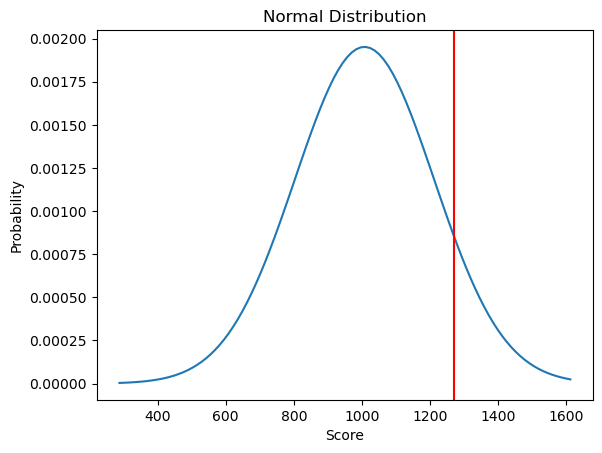

In [13]:
# plot the probability distribution
# we are plotting the distributions here to better visualize the calculations
# ofcourse you do not 'need' to create the following visualization to answer the question above
# you can directly use the cdf function for probability calculations
plt.plot(density["x"], density["pdf"])
plt.axvline(x=score_90th_percentile, c="r")
plt.xlabel("Score")
plt.ylabel("Probability")
plt.title("Normal Distribution")
plt.show()

In [14]:
# calculate the 95th percentile score using ppf() function
score_top_five_percent = norm.ppf(0.95, mu, sigma)
print("The minimum score to be in top 5% should be", round(score_top_five_percent))

The minimum score to be in top 5% should be 1344


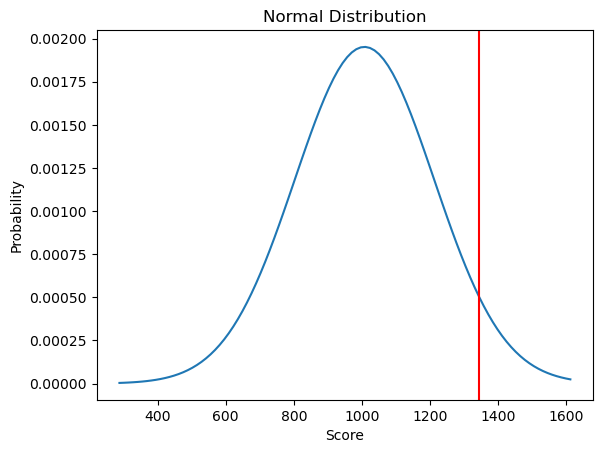

In [15]:
# plot the probability distribution
# we are plotting the distributions here to better visualize the calculations
# ofcourse you do not 'need' to create the following visualization to answer the question above
# you can directly use the cdf function for probability calculations
plt.plot(density["x"], density["pdf"])
plt.axvline(x=score_top_five_percent, c="r")
plt.xlabel("Score")
plt.ylabel("Probability")
plt.title("Normal Distribution")
plt.show()